In [9]:
import tensorflow as tf
import skimage
import numpy as np
import matplotlib.pyplot as plt
import lib

In [10]:
ab_min = -128
ab_max = 128
ab_range = ab_max - ab_min
ab_shift = max(abs(ab_min), 0)


def ab_tensor_to_label(ab_tensor, bin_size=10):
    a = ab_tensor[..., 0]
    b = ab_tensor[..., 1]

    # Translation pour avoir des valeurs positives
    a += ab_shift
    b += ab_shift

    # Discrétisation
    a = a//bin_size
    b = b//bin_size

    # Encodage en base ab_range//bin_size
    base = ab_range//bin_size
    return a*base + b


def label_tensor_to_ab(label_tensor, bin_size=10):
    base = ab_range//bin_size
    a = (label_tensor//base)*bin_size + bin_size//2 - ab_shift
    b = (label_tensor % base)*bin_size + bin_size//2 - ab_shift
    return tf.stack([a, b], axis=2)




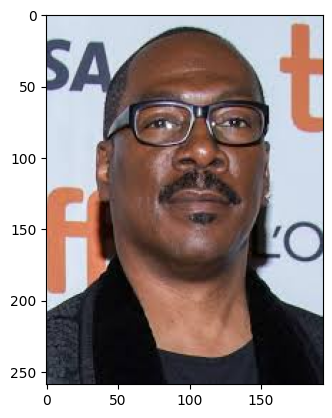

In [11]:
eddie = skimage.io.imread("eddie.jpg")
plt.imshow(eddie)
#afficher(label_tensor_to_ab(ab_tensor_to_label(eddie)))

1. Convertir l'image RGB en Lab
2. Séparer le canal L des canaux ab
3. Convertir les canaux ab en Tensor
4. Faire passer ab (en tensor) dans la moulinette ab->label puis label->ab
5. Recombiner L avec le ab qui sort de la moulinette
6. Convertir la nouvelle image Lab en RGB
7. Afficher.

In [15]:
def my_one_hot(label):
    return tf.one_hot(label, 25*27)

@tf.py_function(Tout=tf.dtypes.int64)
def one_hot_label_image(label_image):
    return np.apply_along_axis(my_one_hot, -1, label_image)


In [30]:
train, test = lib.load_base_datasets()
train = lib.rgb2lab_dataset(train)
train = lib.split_l_and_ab_dataset(train)
train = train.map(lambda l, ab: (l, ab_tensor_to_label(ab)))
train = train.map(lambda l, label: (l, one_hot_label_image(label)))
train = train.cache().prefetch(1)

Found 33062 files.
Using 26450 files for training.
Using 6612 files for validation.
